
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/miokobayashii/summerschool2022/blob/main/day04/Practice13_EmbeddingLayer.ipynb)

# 1. Confirm how an embedding layer works

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import initializers
from keras.models import Sequential, Model
from keras.layers import Embedding, Flatten, Multiply, Input, Dense, Activation

### By using Sequential API (It is explained in the section 2 in this page)

In [2]:
model = Sequential()
model.add(Embedding(input_dim=10, output_dim=3, input_length=1)) 

In [3]:
input_data = np.array([1])
pred = model.predict(input_data)
print(pred)
pred.shape


1/1 [==============================] - 0s 233ms/step
[[[ 0.00226291 -0.01025349  0.03876356]]]


(1, 1, 3)

In [4]:
data = []

for i in np.arange(10):  
    #print(i)
    input_data = np.array([[i]])
    pred = model.predict(input_data)
    data.append(pred.reshape(3))

1/1 [==============================] - 0s 13ms/step


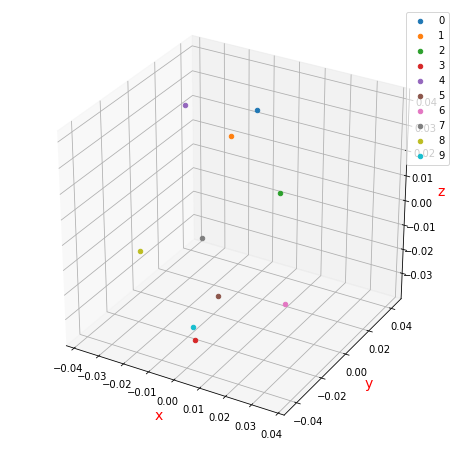

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# add figure
fig = plt.figure(figsize = (8, 8))

# add 3DAxes
ax = fig.add_subplot(111, projection='3d')

# Title of axes
ax.set_title("", size = 20)

# Label for axes
ax.set_xlabel("x", size = 14, color = "r")
ax.set_ylabel("y", size = 14, color = "r")
ax.set_zlabel("z", size = 14, color = "r")

# 
for i in np.arange(10):
    ax.scatter(data[i][0],data[i][1],data[i][2], label=i)

ax.legend()
plt.show()



---



##2. Sequential API vs. Functional API,

With Keras, we have two different ways to make a model. One is based on Sequential API that we have used so far, and the other is the way based on functional API. With **Keras functional API**, we create models that are more flexible than the **Sequential API**.

https://keras.io/guides/functional_api/

The program in section 1 can be replace with functional API

### By using functional API

In [6]:
label = Input(shape=(1, ), dtype='int32')
label_embedding = Embedding(input_dim=10, output_dim=3, input_length=1)(label)
model = Model(label, label_embedding) ## Model(Input data, Output data )

In [ ]:
input_data = np.array([1])
pred = model.predict(input_data)
print(pred)
pred.shape


### Sequential API vs. Functional API

Fix weights and biases to compare two models.

In [8]:
w_value = [1, 1, 1, 2]
b1_value = [0, 0]

#To fix weight and bias, we use  "initializers.Constant"  function.
w_initializer= initializers.Constant(value=w_value)
b1_initializer= initializers.Constant(value=b1_value)

The Sequential model below can be written by Functional API.

In [9]:
#Sequential API
model_seq  = Sequential()
model_seq.add(Dense(2, input_dim=2, kernel_initializer=w_initializer, bias_initializer=b1_initializer))
model_seq.add(Activation('relu'))

In [10]:
model_seq.predict([[5,2]]) 

1/1 [==============================] - 2s 2s/step


array([[7., 9.]], dtype=float32)

In [11]:
# Functional API
input = Input(shape=(2, ))
x = Dense(2, kernel_initializer=w_initializer, bias_initializer=b1_initializer)(input)
out = Activation('relu')(x)
model_func = Model(input, out)

In [12]:
model_func.predict([[5,2]])

1/1 [==============================] - 0s 43ms/step


array([[7., 9.]], dtype=float32)

### Write down your comment and consideration.
